In [3]:
import pandas as pd
import numpy as np
import os
from geopy.geocoders import Nominatim
from contextlib import suppress
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import Adam

In [4]:
rice_df=pd.read_csv('rice_final.csv').drop(['Unnamed: 0'],axis=1)
rice_df

,Commodity,Min Price,Max Price,Modal Price,Latitude,Longitude,Date,Month,Year
0,Rice,2000.0,2500.0,2300.0,24.758640,92.881665,31,12,15
1,Rice,3000.0,3600.0,3200.0,24.758640,92.881665,31,12,15
2,Rice,2400.0,2900.0,2700.0,24.758640,92.881665,31,12,15
3,Rice,2400.0,2900.0,2700.0,24.758640,92.881665,30,12,15
4,Rice,3000.0,3600.0,3200.0,24.758640,92.881665,30,12,15
...,...,...,...,...,...,...,...,...,...
554450,Rice,2700.0,2800.0,2750.0,22.472223,88.093845,7,1,18
554451,Rice,2800.0,2900.0,2850.0,22.472223,88.093845,5,1,18
554452,Rice,2800.0,2900.0,2850.0,22.472223,88.093845,4,1,18
554453,Rice,2700.0,2800.0,2750.0,22.472223,88.093845,2,1,18


In [14]:
def rect80(model1,learning_rate):
        model1.add(Dense(80,input_dim=5,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(3))

        adamopt=Adam(lr=learning_rate)
        model1.compile(loss='mse',optimizer=adamopt,metrics=['mae'])
        
models_dict={
    'rect80':rect80
}

batch_size=[0,128]
learning_rates=[0.01,0.001,0.0001]

In [15]:
for model_func_name, model_func in models_dict.items():
  for learning_rate in learning_rates:
    for batch in batch_size:
        
        X=rice_df[['Latitude','Longitude','Date','Month','Year']].values
        Y=rice_df[['Min Price','Max Price','Modal Price']].values

        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)

        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        print(X_train.shape)
        X_test=sc.transform(X_test)
        
        print(model_func_name)
        model = Sequential()
        model_func(model,learning_rate)

        path='models\\'+model_func_name+'\\'+str(batch)+'_'+str(learning_rate)
        csv_logger=CSVLogger('models/'+model_func_name+'/'+str(batch)+'_'+str(learning_rate)+'training.log',separator=',',append=False)
        
        if batch==0:
            model.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),callbacks=[csv_logger])
        else:    
            model.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),batch_size=batch,callbacks=[csv_logger])
            
        model.save(path)

(526732, 5)
rect80
Train on 526732 samples, validate on 27723 samples
Epoch 1/80
526732/526732 [==============================] - 25s 48us/sample - loss: 792969.0939 - mae: 533.9736 - val_loss: 678556.7777 - val_mae: 491.9409612.95 - ETA: 27s - loss: 103252 - ETA: 25s - loss: 1008839.9903  - ETA: 24s - loss: 981316 - ETA: 22s -  - ETA: 20s - loss: 910890.0214 - mae: 574.407 - ETA: 20s - loss: 910811.8655 - mae - ETA: 19s - loss: 907309.1222 - mae: 571.6 - ETA: 19s - loss: 905434.257 - ETA: 18s - loss: 894244.9444 - m - ETA: 17s - loss: 887452.50 - ETA: 16s - loss: 877101.8247 - mae: 561.325 - ETA: 16s - loss: 877144.3011 - mae:  - ETA: - ETA: 13s - loss: 848169.1950 - ma - ETA: 12s - loss: 846303.0954 - mae: 55 - ETA: 12s - loss: 843702.1151 - mae - ETA: 12s - loss: 840611.3210 - mae: 55 - E - ETA: 0s - l
Epoch 2/80
526732/526732 [==============================] - 26s 48us/sample - loss: 713363.1980 - mae: 504.9900 - val_loss: 657156.7969 - val_mae: 486.1158
Epoch 3/80
526732/526732 [=

526732/526732 [==============================] - 24s 46us/sample - loss: 554493.7811 - mae: 427.9237 - val_loss: 528329.1147 - val_mae: 432.3176- loss: 551317.9154  - ETA: 22s - loss: 559416.9047 - ETA: 21s - loss: 573493.4 - ETA: 20s - loss:  - ETA: 19s - loss: 563098.6352 - mae: 430.96 - ETA: 19s - loss:  - ETA: 15s - loss: 55491 - ETA: 14s - loss: 555 - ETA: 12s - loss: 557389. - ETA: 11s - loss: 557271.2721 - mae: 429.1 - ETA: 9s - loss: 558616.1484 - m - - ETA - ETA: 1s - loss: 554845.6739 - mae - ETA: 
Epoch 43/80
526732/526732 [==============================] - 24s 46us/sample - loss: 552144.4396 - mae: 427.3657 - val_loss: 536025.4297 - val_mae: 418.7356 ETA: 16s - loss: 545048.1254 - mae: 427 - ETA: 16s - loss: 543364.4185 - - ETA: 13s - loss: 541882.8830 - mae: 425 - ETA: 12s - loss: 5 - ETA: 0s - loss: 552239.6575 - mae: 427.
Epoch 44/80
526732/526732 [==============================] - 24s 46us/sample - loss: 552788.1156 - mae: 427.8681 - val_loss: 533605.7852 - val_mae: 413

526732/526732 [==============================] - 24s 46us/sample - loss: 540824.0222 - mae: 421.9721 - val_loss: 526773.7656 - val_mae: 410.4571 - loss: 556640.7459 - mae: 4 - ETA: 22s - loss: 556636.4709 - mae: 422.394 - ETA: 22s - loss: 554 - ETA: 20s - ETA: 18s - loss: 543479.7082 - mae: 421. - ETA: 
Epoch 79/80
526732/526732 [==============================] - 24s 46us/sample - loss: 543940.8235 - mae: 423.2874 - val_loss: 517517.4588 - val_mae: 421.33763s - l - E - ETA: 10s - loss: 546787.2373 - ma - ETA: 0s - ETA: 0s - loss: 544127.7378 - mae: 423.
Epoch 80/80
526732/526732 [==============================] - 24s 46us/sample - loss: 545327.2286 - mae: 424.1936 - val_loss: 529226.8979 - val_mae: 426.7306 - mae: 4 - ETA: 21s - loss: 547051.4256 - mae: 424.0 - ETA: 21s - loss: 545158.6197 - mae: 423 - ETA: 21s - loss: 544098.7836 - - ETA: 20s - loss: 541929.695 - E - ETA: 1s - loss: 546393.9555 - m - ETA: 1s - loss: 546250.5509 - - ETA: 
INFO:tensorflow:Assets written to: models\rect8

526732/526732 [==============================] - 24s 46us/sample - loss: 575663.4815 - mae: 438.4450 - val_loss: 559283.4750 - val_mae: 421.2332
Epoch 10/80
526732/526732 [==============================] - 25s 47us/sample - loss: 568603.3056 - mae: 434.9681 - val_loss: 538708.1035 - val_mae: 426.5242439.455 - ETA: 22s - loss: 576201 - ETA: 18s - loss: 586182.1155 - mae:  - ETA: 17s - loss: 584742.9048 - mae: 43 - ETA: 17s - lo - ETA:  - ETA: 13s - loss: 572815.2436 - mae: - ETA: 13s - loss: - - ETA: 0s - loss: 569073.91
Epoch 11/80
526732/526732 [==============================] - 24s 46us/sample - loss: 560861.1939 - mae: 431.3859 - val_loss: 547145.6326 - val_mae: 430.6341s: 519857.5930 - mae: 428.1 - ETA: 23s - loss: 534064.2584 - mae: 431.8 - ETA: 23s - loss: 538005.7439 - mae - ETA: 22s - loss: 558 - ETA: 15s - loss: 565451.3113  - ETA: 15s - loss: 5617 - ETA: 13s - loss: 563066.3394 - mae - ET - ETA: 11s - loss: 559879.0844 - mae: - ETA: 2s - los - ETA: 0s - loss: 560845.4641 - ma

526732/526732 [==============================] - 24s 46us/sample - loss: 464226.4672 - mae: 372.7941 - val_loss: 445036.8652 - val_mae: 363.5735- loss: 413577.3827 - mae: 363.02 - ETA: 18s - loss: 464936.3143 - mae: 372.8 - ETA: 18s - loss: 4650 - ETA: 14s - loss: 460238.4199 - mae: - ETA: 13s - loss: 460835.6887 - mae: 372. - ETA: 13s - loss: 45982 - ETA: 12s - loss: 461473.6612 -  - ETA: 11 - ETA: 10s - loss: 46 - - ETA: 7s - loss: 463091.51 - ETA: 6s - loss: 465 - ETA: 6s - loss: 466914. - - ETA: 0s - loss: 465111.9727 - m - ETA: 0s - loss: 464952.80 - ETA: 0s - loss: 464486.8947 - mae: 
Epoch 54/80
526732/526732 [==============================] - 24s 46us/sample - loss: 462610.2522 - mae: 371.8404 - val_loss: 448280.8470 - val_mae: 370.6107179.2302 - ma - ETA: 21s - loss: 466978.5937 - mae: 370.5 - ETA: 4s - loss: 466670.6616 - mae:  - ETA: 3s - loss: 465342.4691 - mae: 372. - ETA: 3s - loss: 464900.6819 - mae - ETA: 2s - loss: 463741.64
Epoch 55/80
526732/526732 [=================

526732/526732 [==============================] - 7s 14us/sample - loss: 494333.7660 - mae: 396.7462 - val_loss: 486296.9054 - val_mae: 394.2365
Epoch 44/80
526732/526732 [==============================] - 7s 14us/sample - loss: 492103.2803 - mae: 395.5025 - val_loss: 473205.0863 - val_mae: 386.8363
Epoch 45/80
526732/526732 [==============================] - 8s 14us/sample - loss: 491142.4387 - mae: 394.5501 - val_loss: 468755.9731 - val_mae: 396.5361
Epoch 46/80
526732/526732 [==============================] - 8s 14us/sample - loss: 489348.8586 - mae: 393.7686 - val_loss: 480216.0922 - val_mae: 407.4314
Epoch 47/80
526732/526732 [==============================] - 8s 14us/sample - loss: 488462.0181 - mae: 393.0774 - val_loss: 467936.9272 - val_mae: 394.7712
Epoch 48/80
526732/526732 [==============================] - 7s 13us/sample - loss: 487595.8836 - mae: 392.2585 - val_loss: 462436.7627 - val_mae: 389.1961
Epoch 49/80
526732/526732 [==============================] - 7s 13us/sample 

526732/526732 [==============================] - 24s 46us/sample - loss: 652052.4977 - mae: 475.5743 - val_loss: 628938.1631 - val_mae: 467.5576loss: 655564.5659 - mae: 48 - ETA: 23s - loss: 664495.7023 - mae: - ETA: 22s - loss: 672388.5982 - mae: 48 - ETA: 22s - loss: 661000.0748 - mae: 4 - ETA: 22s - loss: 658369.8438 - mae: 477 - ETA: 21s - loss: 646152.3909 - m - ETA: 21s - loss: 6 - ETA: 17s - loss: 653774.9775 - mae: 477.465 - ETA: 17s - loss: 652955.6443 - ma - ETA: 16s - loss: 648420.8879 - - ETA: 15s - loss: 648830.5755 - mae: 475.953 - ETA: 15s - loss: 649405.7205 - mae: 4 - ETA: 15s  - ETA: 13s - loss: 647465.9324 - mae: 476.0 - ETA: 13s - loss: 647594.6335 - mae:  - ETA: 12s - loss: 649384.8846 - mae: 476 - ETA: 12s - loss: 651093.7754 - mae: 477. - ETA: 12s - loss: 651463.974 - ETA: 11s - loss: 649347.0311 - mae: - ETA: 11s - loss: 647284.1016  - ETA: 10s - loss: 647414.4008 - mae: 476.593 - ETA: 10s - los - E - ETA: 7s - loss: 647860.9997 - mae: 475.91 - ETA: 7s - loss: 6

526732/526732 [==============================] - 25s 47us/sample - loss: 609144.2211 - mae: 453.1721 - val_loss: 584326.3649 - val_mae: 445.4929s - loss: 645997.6616 - m - ETA: 23s - loss: 619542.7133 - mae: 457 - ETA: 23s - loss: 614874.3144 - mae: 4 - ETA: 23s - loss: 605144.9872 - mae: 454. - ETA: 22s - loss: 602458.4424 - mae: 451.422 - ETA: 22s - loss: 602766.3287 - mae: 4 - ETA: 22s - loss: 598833.0497 - mae: 449 - ETA: 22s - loss: 596706.2826 - mae: 4 - ETA: 21s - loss: 593058.0067  - ETA: 20s - loss: 597638.3670  - ETA: 19s - loss: 594323.0546 - mae:  - ETA: 19s - loss: 594407 - ETA: 18s - loss: 595955.9549 - mae: 449.730 - ETA: 18s - loss: 596897.44 - ETA: 17s - loss: 598999.5405 - mae: - ETA: 16s - loss: 597510.9043 - m - ETA: 16s - loss: 5 - ETA: 6s - loss: 604656.0857 - ETA: 5s - loss: 606676.0869 - mae - ETA: 5s - loss: 606907.3962 - mae:  - - ETA: 4s - loss: 611574.7359 - mae: 45 - ETA: 4s - loss: 611762.5122 - ETA: 0s - loss: 608514.7887 - mae: 45
Epoch 37/80
526732/5267

526732/526732 [==============================] - 25s 47us/sample - loss: 574944.1205 - mae: 439.8909 - val_loss: 551473.5352 - val_mae: 440.7078 mae: 437 - ETA: 22s - loss: 557586.68 - ETA: 21s - loss: 5 - ETA: 19s - loss: 571327.5729 - mae: 439.11 - ETA: 19s - loss: 571344.3172 - mae: 438.982 - E - ETA: 17s - loss: 572110. - ETA: 16s - loss: 575933.7869 - mae:  - ETA: 15s - loss: 573486.2744 - mae - ETA: 15s - loss: 570798. - ETA: 14s - lo - ETA: 12s - loss: 574216.5834 - mae:  - ETA: 12s - loss: - ETA: 8s - loss: 571227. - ETA:  - ETA: 6s - loss: 572076. - ETA: 6s - loss: 572756.6399 - mae - ETA: 5s - loss: 572944.1183 - mae - ETA: 5s - loss: 572 - ETA: 4s - loss: 572861.7429 - mae - ETA: 4s - loss: 573882.0820 - mae: 440. -
Epoch 55/80
526732/526732 [==============================] - 25s 47us/sample - loss: 572806.2562 - mae: 439.1499 - val_loss: 545242.2635 - val_mae: 439.296222s - loss: 570147.9235 - mae: 440.032 - ETA: 22s - loss: 569245.9724 - mae: 440.1 - ETA: 21s - loss: 57068

526732/526732 [==============================] - 25s 47us/sample - loss: 541085.5337 - mae: 425.6176 - val_loss: 529580.0339 - val_mae: 421.148923s - loss: 520237.4904 - mae: 421. - ETA: 22s - loss: 519923.3019 - mae: 421.544 - ETA: 22s - loss: 518836.4604  - ETA: 22s - loss: 552375.5563 -  - ETA: 21s - loss: 547264.8128 - mae: 4 - ETA: 20s - loss: 547456. - ETA: 19s - loss - ETA: 18s - loss: 545361.1142 - mae: - ETA: 17s - loss: 544765.1111 - mae: 424 - ETA: 17s - loss: - ETA: 15s - loss: 541415.7798 - mae: 424.24 - ETA: 15s - loss: 541071.0231 - mae:  - ETA: 15s - loss: 540407.6358 - - ETA: 14s - loss: 538675.2312 - mae:  - ETA: 11s - loss: 542235.6855 - mae: 424 - ETA: 11s - loss: 541035.2791 - mae: 424.6 - ETA: 11s - loss: 540156.4129 - mae: 42 - ETA: 11s - loss: 540824.5585 - mae: 424.46 - ETA: 10s - loss: 541 - ETA: 9s - loss: 540558.1294 - mae: 424. - ETA: 9s - loss: 540715.7370 - mae: 424.92 - ETA: 9s - loss: 540846.2783 - mae - ETA: 9s - loss: 5 - ETA: 8s - loss: 540958. - ETA

In [1]:
#testing performance of all variations of rect80

In [5]:
path='C:/Users/ABC/Desktop/BE Project/from milan/rice/models/rect80'
folders=['loss_mae']
learning_rate=[0.001]
batch_sizes=[0]

In [6]:
rice_df=pd.read_csv('rice_final.csv').drop(['Unnamed: 0'],axis=1)

In [7]:
X=rice_df[['Latitude','Longitude','Date','Month','Year']].values
Y=rice_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
for folder in folders:
    for batch_size in batch_sizes:
        for lr in learning_rate:
            
            model=tf.keras.models.load_model(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)))
            #log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))
            
            Y_pred=model.predict(X_test)
            percent_acc=np.zeros((len(X_test),3))
            
            for i in range(len(X_test)):
                for j in range(3):
                    percent_acc[i][j]=abs(Y_test[i][j]-Y_pred[i][j])*100/Y_test[i][j]   
                    
            print(sum(percent_acc)/len(X_test),batch_size,lr,folder)

[19.8598189  20.21819082 19.15297604] 0 0.01 loss_mse
[16.33155729 16.97128058 16.13503397] 0 0.001 loss_mse
[18.60147571 19.95806521 18.47264556] 0 0.0001 loss_mse
[17.33334712 18.41007127 17.00243863] 128 0.01 loss_mse
[17.27824613 17.90514551 16.9073957 ] 128 0.001 loss_mse
[20.11887574 22.80736793 20.71572355] 128 0.0001 loss_mse
[16.8190781  16.90803501 16.11270304] 0 0.01 loss_mae
[13.53427923 14.50589497 13.57297031] 0 0.001 loss_mae
[16.27431951 17.85059532 16.41679053] 0 0.0001 loss_mae
[14.95618067 15.9632859  14.95334987] 128 0.01 loss_mae
[14.44999756 15.4692177  14.57637263] 128 0.001 loss_mae
[17.16504014 19.02538787 17.61281585] 128 0.0001 loss_mae


In [ ]:
////////////////////////

MAE :  331.34307138800136 , val_MAE :  335.09589253477094 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mae , rect80


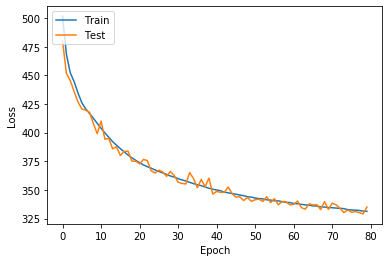

In [11]:
for folder in folders:
    for batch_size in batch_sizes:
        for lr in learning_rate:
            log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))
            
            if folder=='loss_mse':
                print('MAE : ',log_data['mae'][79],', val_MAE : ',log_data['val_mae'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,', rect80')
                #df1[lr]=log_data['val_mae']
                plt.plot(log_data['mae'])
                plt.plot(log_data['val_mae'])
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Test'],loc='upper left')
                plt.show()
                
            if folder=='loss_mae':
                print('MAE : ',log_data['loss'][79],', val_MAE : ',log_data['val_loss'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,', rect80')
                #df[lr]=log_data['val_loss']
                plt.plot(log_data['loss'])
                plt.plot(log_data['val_loss'])
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend(['Train','Test'],loc='upper left')
                plt.show()

In [35]:
df=pd.DataFrame()
df1=pd.DataFrame()

In [39]:
df=df.rename(columns={0:'Batch GD',128:'Minibatch GD'})

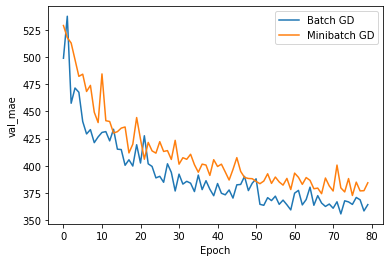

In [40]:
plt.plot(df)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df.columns,loc='upper right')

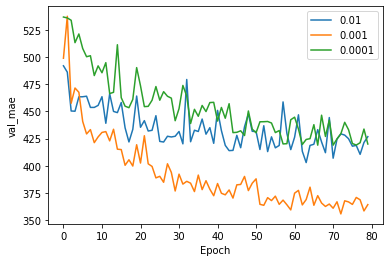

In [46]:
plt.plot(df1)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df1.columns,loc='upper right')